{'RECORD_SENTENCE': 'You must admit that Bryant Gumbel is one of the dumbest racists around - an arrogant dope with no talent. Failed at CBS etc-why still on TV?'} 

emotion_tones:
     Anger : 0.256374
     Disgust : 0.545029
     Fear : 0.06681
     Joy : 0.000975
     Sadness : 0.276992


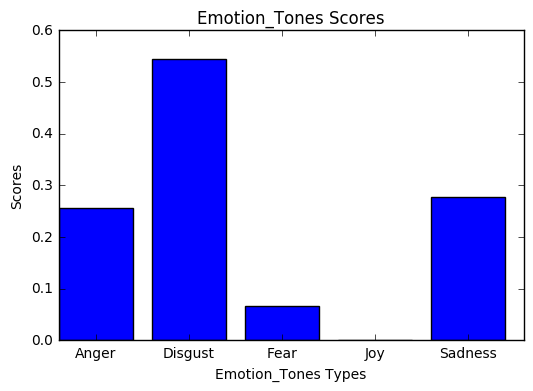

language_tones:
     Analytical : 0.0
     Confident : 0.0
     Tentative : 0.0


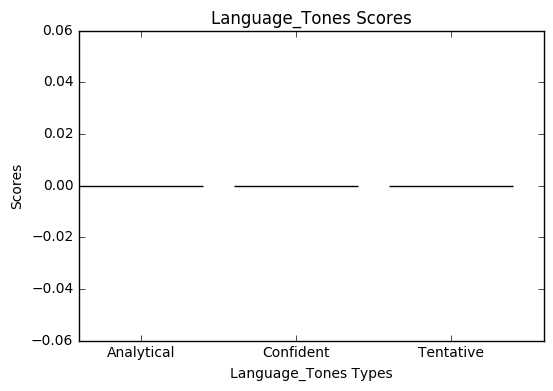

social_tones:
     Openness : 0.672003
     Conscientiousness : 0.011515
     Extraversion : 0.745607
     Agreeableness : 0.014765
     Emotional Range : 0.43343


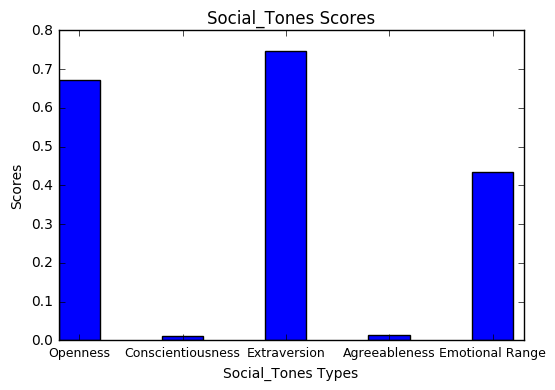

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pymysql.cursors
import json
from watson_developer_cloud import ToneAnalyzerV3


tone_analyzer = ToneAnalyzerV3(
   username='7b28bccc-b053-4d82-8405-2807ec28e4f7',
   password='KqfZpftL52iY',
   version='2016-05-19 ')

# dict_in = request.json
# selected_date = dict_in['selected_date']

connection = pymysql.connect(host='47.91.155.55',
                             user='AVASKY',
                             password='avasql1',
                             db='mydb',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    with connection.cursor() as cursor:
        
        selected_date = "23"

        sql = "SELECT RECORD_SENTENCE FROM record WHERE RECORD_DATE =%s"
        cursor.execute(sql, selected_date)

        result = cursor.fetchone()
        
        print(result, "\n")

        textdata = result["RECORD_SENTENCE"]
        
        waston_result = tone_analyzer.tone(text=textdata)
        
        document_tone = waston_result["document_tone"]
        
        tone_categories = document_tone["tone_categories"]
        
        emotion_tones = tone_categories[0]
        language_tones = tone_categories[1]
        social_tones = tone_categories[2]
        
        emotion_tones_list = emotion_tones["tones"]
        language_tones_list = language_tones["tones"]
        social_tones_list = social_tones["tones"]
        
        
        # Print scores and draw bar diagrams
        print("emotion_tones:")
        for item in emotion_tones_list:
            print("     %s : %s"%(item["tone_name"], item["score"]))
          
        plt.xlabel('Emotion_Tones Types')    
        plt.ylabel('Scores')    
        plt.title('Emotion_Tones Scores')  
        
        data_list = emotion_tones_list

        x = np.arange(len(data_list))
        data = [item2["score"] for item2 in data_list]
        labels = [item3["tone_name"] for item3 in data_list]

        plt.bar(1 + 1 * x, data, tick_label=labels)        
        plt.xticks(1.4 + 1 * x)
        plt.show()


        print("language_tones:")
        for item in language_tones_list:
            print("     %s : %s"%(item["tone_name"], item["score"]))
        
        plt.xlabel('Language_Tones Types')    
        plt.ylabel('Scores')    
        plt.title('Language_Tones Scores')  
        
        data_list = language_tones_list

        x = np.arange(len(data_list))
        data = [item2["score"] for item2 in data_list]
        labels = [item3["tone_name"] for item3 in data_list]

        plt.bar(1 + 1 * x, data, tick_label=labels)        
        plt.xticks(1.4 + 1 * x)
        plt.show()
        

        print("social_tones:")
        for item in social_tones_list:
            print("     %s : %s"%(item["tone_name"], item["score"]))
        
        plt.xlabel('Social_Tones Types')    
        plt.ylabel('Scores')    
        plt.title('Social_Tones Scores')  
        
        data_list = social_tones_list

        x = np.arange(len(data_list))
        data = [item2["score"] for item2 in data_list]
        labels = [item3["tone_name"] for item3 in data_list]

        plt.bar(1 + 2 * x, data, tick_label=labels)        
        plt.xticks(1.4 + 2 * x, fontsize=9)
        plt.show()
        
        
        
        # json_out = json.dumps(document_tone, indent=2)
        
        # print("json_out", json_out)
        

finally:
    connection.close()


#return json_out
